In [27]:
# LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score, roc_auc_score, multilabel_confusion_matrix, roc_curve
from scipy.sparse import issparse
import time

In [21]:
# DATA
df_brfss = pd.read_csv('/Users/macbook/Library/CloudStorage/GoogleDrive-nurrachmandzakiyullah@gmail.com/My Drive/23. Colab Notebooks/1. AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/3. Fix Model/Final_dataset_Diabetes_Complication.csv')
x = df_brfss.iloc[:, :26].values
X = preprocessing.normalize(x)
y = df_brfss.iloc[:, 26:].values-1

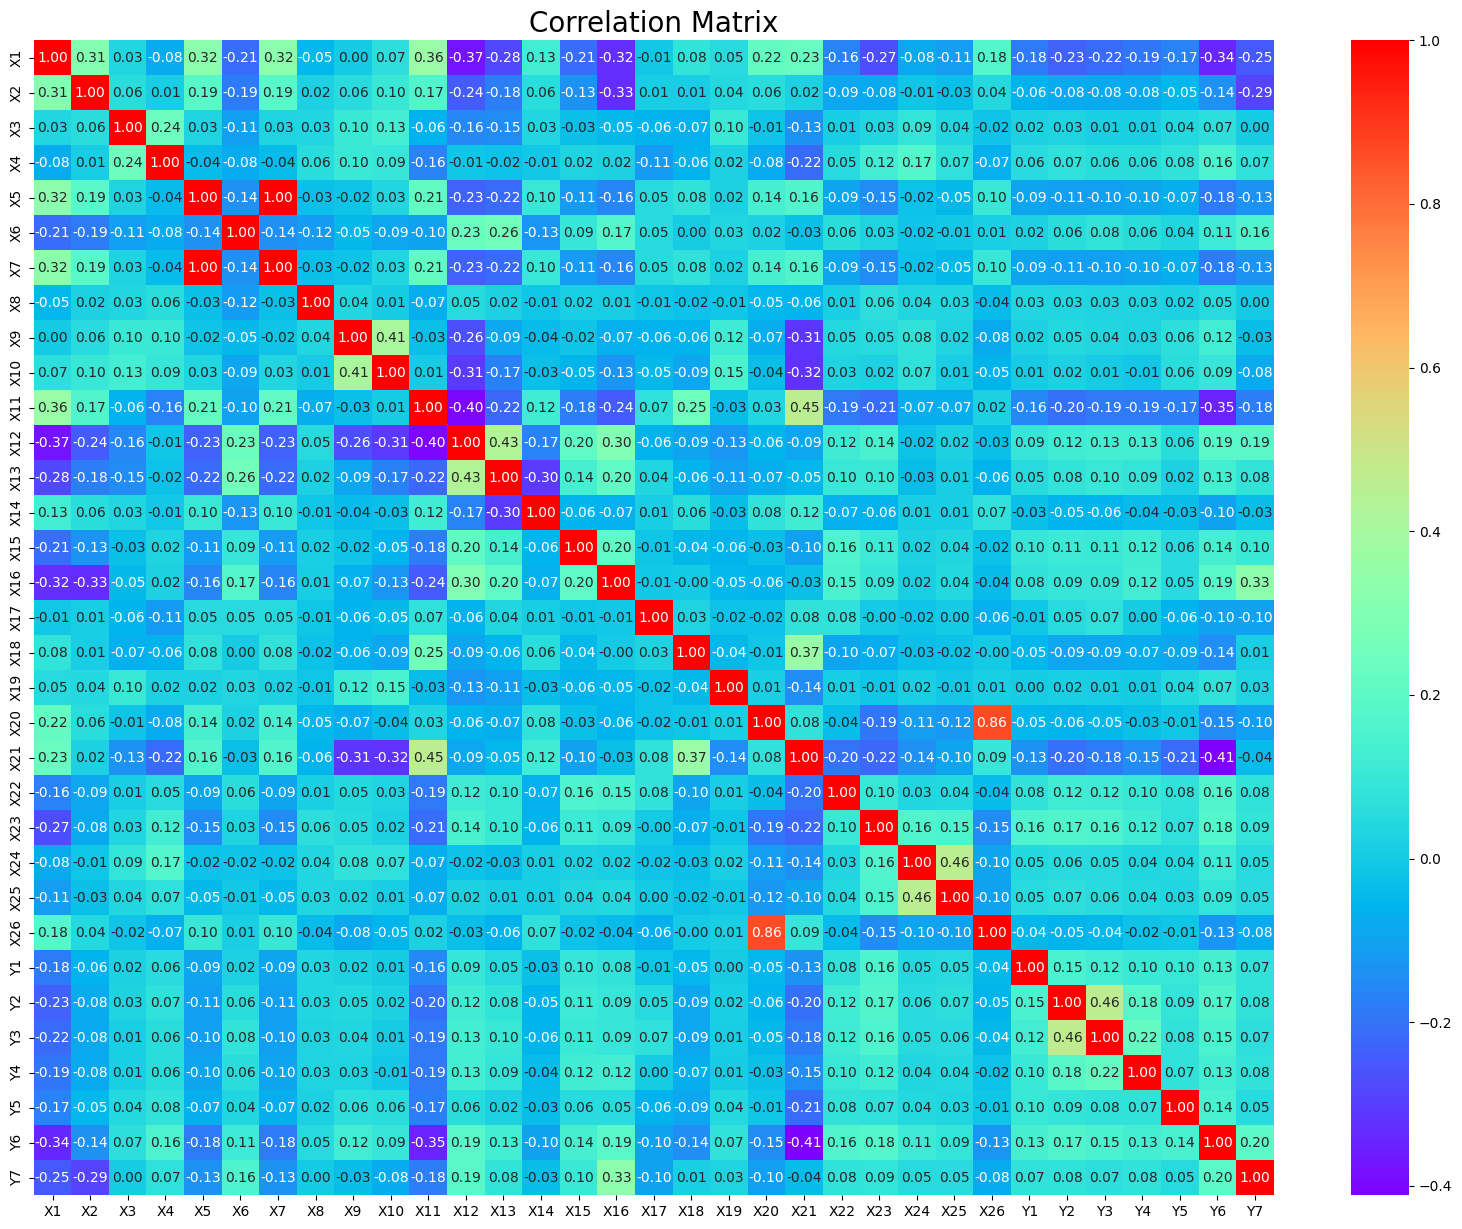

In [22]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_brfss.corr(), annot=True, fmt=".2f", ax=ax, cmap = "rainbow" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [23]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()

In [41]:
# Train with time
start = time.time()

# Initialize a list to store the classifiers
classifiers = []

# Train one Logistic Regression model for each label
for i in range(y_train.shape[1]):
    # Create a new binary target variable for the current label
    y_train_label = y_train[:, i]
    
    # Initialize a new Logistic Regression model
    model = LogisticRegression(random_state=0)
    
    # Train the model on the current label
    model.fit(X_train, y_train_label)
    
    # Add the trained model to the list of classifiers
    classifiers.append(model)

training_time = time.time() - start

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [43]:
# Get the parameter values
params = model.get_params()

# Print the parameter values
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [46]:
# Perform 10-fold cross-validation for each classifier
fold_scores = []
for i, model in enumerate(classifiers):
    start = time.time()
    predicted_labels = cross_val_predict(model, X, y[:, i], cv=10)
    fold_time = time.time() - start
    fold_scores.append((i, predicted_labels, fold_time))

# Print the parameter values for the last classifier
params = model.get_params()
print(params)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [47]:
# Testing with time
start = time.time()

# Initialize a list to store the predictions for each label
predictions_list = []

# Make predictions for each label using the corresponding classifier
for i, model in enumerate(classifiers):
    label_predictions = model.predict(X_test)
    predictions_list.append(label_predictions)

# Convert predictions_list to a dense array and transpose
predictions_dense = np.hstack([np.expand_dims(pred, axis=1) for pred in predictions_list]).T

testing_time = time.time() - start


In [59]:
# Convert sparse matrix to dense array
predictions_dense = np.hstack([np.expand_dims(pred, axis=1) for pred in predictions_list]).T

print("Shape of y_test:", y_test.shape)
print("Shape of predictions_dense:", predictions_dense.shape)

Shape of y_test: (120816, 7)
Shape of predictions_dense: (7, 120816)


In [62]:
# Transpose y_test and predictions_dense

predictions_dense_transposed = predictions_dense.T

print("Shape of y_test:", y_test.shape)
print("Shape of predictions_dense:", predictions_dense_transposed.shape)

Shape of y_test: (120816, 7)
Shape of predictions_dense: (120816, 7)


# 1. Matrix Evaluation Label Based


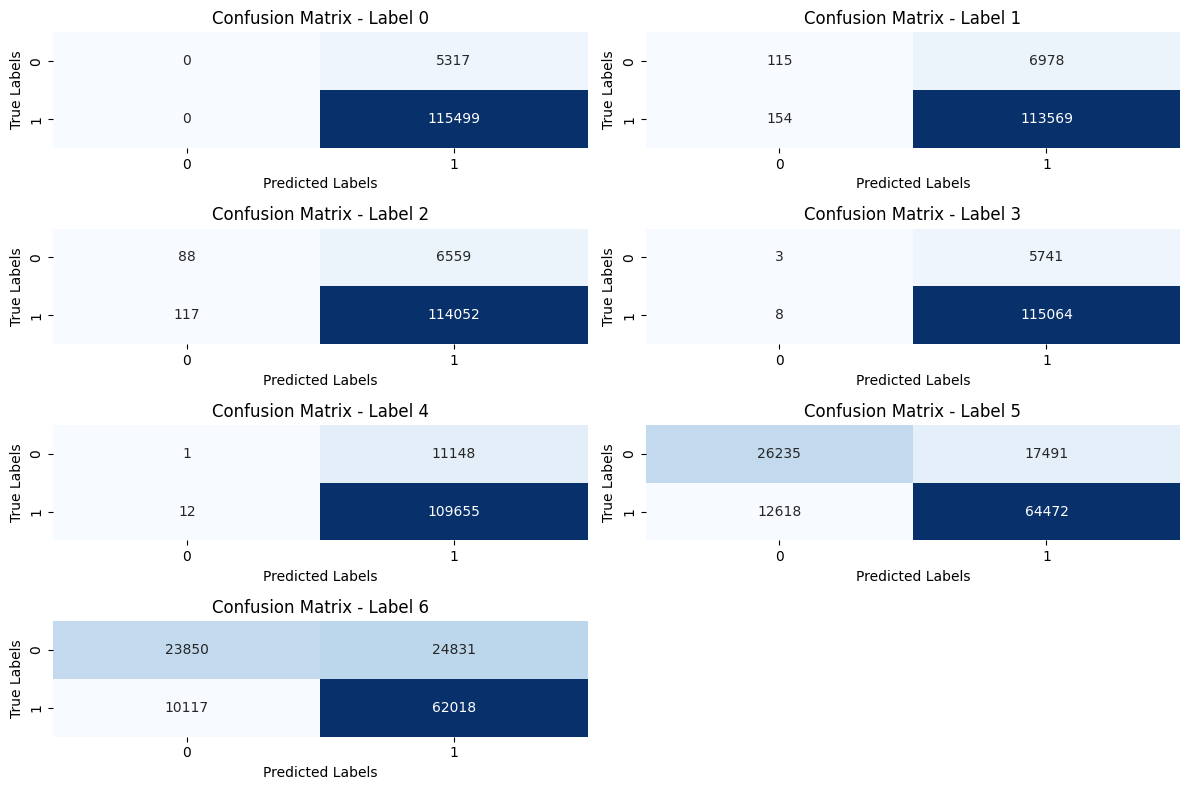

In [64]:
# Multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test, predictions_dense_transposed)

# Determine the grid dimensions for subplots
num_labels = cm.shape[0]
cols = min(num_labels, 2)
rows = (num_labels + cols - 1) // cols

# Plot confusion matrix
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (matrix, ax) in enumerate(zip(cm, axes.ravel())):
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Label {i}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Remove unused subplots if necessary
if num_labels < rows * cols:
    for j in range(num_labels, rows * cols):
        fig.delaxes(axes.ravel()[j])

plt.tight_layout()
plt.show()

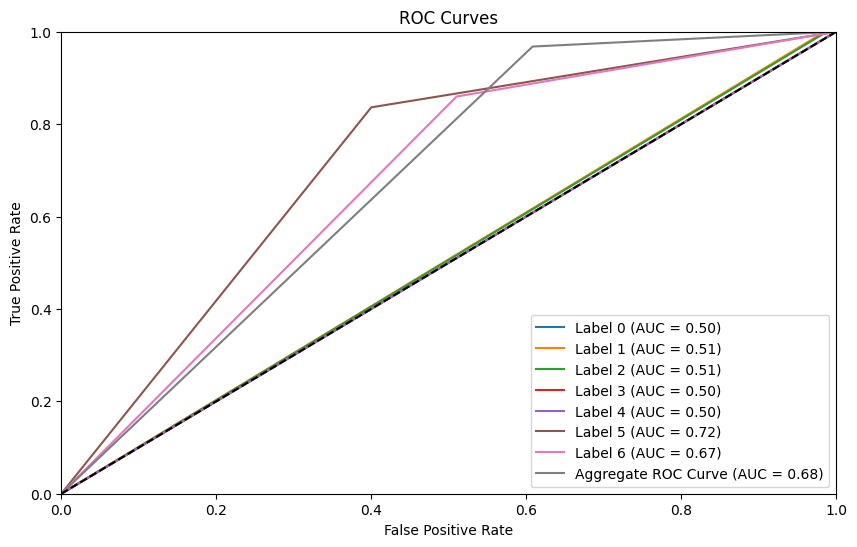

In [66]:
# Initialize the roc_auc_per_label dictionary
roc_auc_per_label = {}

# Plot ROC curve for each label
plt.figure(figsize=(10, 6))
for i in range(y.shape[1]):
    y_test_label = np.squeeze(y_test[:, i].toarray()) if issparse(y_test[:, i]) else np.squeeze(y_test[:, i])
    y_pred_label = np.squeeze(predictions_dense_transposed[:, i].toarray()) if issparse(predictions_dense_transposed[:, i]) else np.squeeze(predictions_dense_transposed[:, i])
    fpr, tpr, _ = roc_curve(y_test_label, y_pred_label)
    roc_auc_per_label[i] = roc_auc_score(y_test_label, y_pred_label)
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))

# Plot aggregate AUC ROC
fpr_aggregate, tpr_aggregate, _ = roc_curve(y_test.ravel(), predictions_dense_transposed.ravel())
roc_auc_aggregate = roc_auc_score(y_test.ravel(), predictions_dense_transposed.ravel())
plt.plot(fpr_aggregate, tpr_aggregate, label='Aggregate ROC Curve (AUC = %0.2f)' % roc_auc_aggregate)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


# 2. Matrix Evaluation Example Based


In [67]:
# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_dense_transposed)
precision = precision_score(y_test, predictions_dense_transposed, average='micro')
recall = recall_score(y_test, predictions_dense_transposed, average='micro')
f1 = f1_score(y_test, predictions_dense_transposed, average='micro')
hamming_loss_score = hamming_loss(y_test, predictions_dense_transposed)
jaccard = jaccard_score(y_test, predictions_dense_transposed, average='micro')
auc_roc = roc_auc_score(y_test.ravel(), predictions_dense_transposed.ravel())


In [68]:
print('Training Time:', round(training_time, 2), 'seconds')
print('Cross-validated Testing Time:', round(cross_val_time, 2), 'seconds')
print('Testing Time on Specific Test Set:', round(testing_time, 2), 'seconds')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Hamming Loss:', hamming_loss_score)
print('Jaccard Score:', jaccard)
print('AUC-ROC:', auc_roc)


Training Time: 51.95 seconds
Cross-validated Testing Time: 63.85 seconds
Testing Time on Specific Test Set: 0.08 seconds
Accuracy: 0.4476559396106476
Precision: 0.8989311154669767
Recall: 0.9679015271378885
F1 Score: 0.9321422602062495
Hamming Loss: 0.11953360009081106
Jaccard Score: 0.8729086520328883
AUC-ROC: 0.6798574924579024


In [69]:
import sklearn.metrics

print('Exact Match Ratio: {0}'.format(sklearn.metrics.accuracy_score(y_test, predictions_dense_transposed, normalize=True, sample_weight=None)))
print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_test, predictions_dense_transposed))) 
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test, y_pred=predictions_dense_transposed, average='samples'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test, y_pred=predictions_dense_transposed, average='samples')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test, y_pred=predictions_dense_transposed, average='samples'))) 

Exact Match Ratio: 0.4476559396106476
Hamming loss: 0.11953360009081106
Recall: 0.8956677726381242
Precision: 0.9663089995963954
F1 Measure: 0.9225023912946043


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#Subet Accuracy atau Exact Match Ratio
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_dense_transposed)

0.4476559396106476

In [71]:
# HITUNG HAMMING LOSS
from sklearn.metrics import hamming_loss
hamming_loss(y_test, predictions_dense_transposed)

0.11953360009081106

In [72]:
from sklearn.metrics import jaccard_score
print('jaccard_score_Samples: {0}'.format(jaccard_score(y_test, predictions_dense_transposed, average='samples')))
print('jaccard_score_Micro: {0}'.format(jaccard_score(y_test, predictions_dense_transposed, average="micro")))
print('jaccard_score_Macro: {0}'.format(jaccard_score(y_test, predictions_dense_transposed, average="macro")))


jaccard_score_Samples: 0.8704304578075437
jaccard_score_Micro: 0.8729086520328883
jaccard_score_Macro: 0.8604129214919285


In [73]:
from sklearn.metrics import zero_one_loss
print('Zero_one_loss: {0}'.format(zero_one_loss(y_test, predictions_dense_transposed)))
print('Zero_one_loss_Samples: {0}'.format(zero_one_loss(y_test, predictions_dense_transposed, normalize=False)))

Zero_one_loss: 0.5523440603893524
Zero_one_loss_Samples: 66732


In [74]:
from sklearn.metrics import f1_score

print('f1_score_micro: {0}'.format(f1_score(y_test, predictions_dense_transposed, average='micro')))
print('f1_score_macro: {0}'.format(f1_score(y_test, predictions_dense_transposed, average='macro')))
print('f1_score_weighted: {0}'.format(f1_score(y_test, predictions_dense_transposed, average='weighted')))
print('f1_score_none: {0}'.format(f1_score(y_test, predictions_dense_transposed, average=None)))


f1_score_micro: 0.9321422602062495
f1_score_macro: 0.9195290759774392
f1_score_weighted: 0.9332655611408965
f1_score_none: [0.97750037 0.96955649 0.97156487 0.97562713 0.95157721 0.81069832
 0.78017914]


In [75]:
from sklearn.metrics import fbeta_score

print('fbeta_macro: {0}'.format(fbeta_score(y_test, predictions_dense_transposed, average='macro', beta=0.5)))
print('fbeta_micro: {0}'.format(fbeta_score(y_test, predictions_dense_transposed, average='micro', beta=0.5)))
print('fbeta_weighted: {0}'.format(fbeta_score(y_test, predictions_dense_transposed, average='weighted', beta=0.5)))
print('fbeta_none: {0}'.format(fbeta_score(y_test, predictions_dense_transposed, average=None, beta=0.5)))

fbeta_macro: 0.8992545872238511
fbeta_micro: 0.911927481743168
fbeta_weighted: 0.9139766136091054
fbeta_none: [0.9644801  0.95290236 0.95582899 0.96160403 0.92476711 0.79606462
 0.73913489]


In [76]:
from sklearn.metrics import precision_recall_fscore_support

print('recision_recall_fscore_support_macro: {0}'.format(precision_recall_fscore_support(y_test, predictions_dense_transposed, average='macro')))
print('recision_recall_fscore_support_micro: {0}'.format(precision_recall_fscore_support(y_test, predictions_dense_transposed, average='micro')))
print('recision_recall_fscore_support_weighted: {0}'.format(precision_recall_fscore_support(y_test, predictions_dense_transposed, average='weighted')))
print('recision_recall_fscore_support_none: {0}'.format(precision_recall_fscore_support(y_test, predictions_dense_transposed, average=None)))

recision_recall_fscore_support_macro: (0.8863724015806758, 0.9562160509441782, 0.9195290759774392, None)
recision_recall_fscore_support_micro: (0.8989311154669767, 0.9679015271378885, 0.9321422602062495, None)
recision_recall_fscore_support_weighted: (0.9016682490097182, 0.9679015271378885, 0.9332655611408965, None)
recision_recall_fscore_support_none: (array([0.95599093, 0.94211386, 0.94561856, 0.95247713, 0.90771752,
       0.78659883, 0.71408997]), array([1.        , 0.99864583, 0.9989752 , 0.99993048, 0.99989058,
       0.83632118, 0.85974908]), array([0.97750037, 0.96955649, 0.97156487, 0.97562713, 0.95157721,
       0.81069832, 0.78017914]), array([115499, 113723, 114169, 115072, 109667,  77090,  72135]))


In [77]:
from sklearn.metrics import precision_score
print('precision_score_macro: {0}'.format(precision_score(y_test, predictions_dense_transposed, average='macro')))
print('precision_score_micro: {0}'.format(precision_score(y_test, predictions_dense_transposed, average='micro')))
print('precision_score_weighted: {0}'.format(precision_score(y_test, predictions_dense_transposed, average='weighted')))
print('precision_score_none: {0}'.format(precision_score(y_test, predictions_dense_transposed, average=None)))
print('precision_score_zero_divisio: {0}'.format(precision_score(y_test, predictions_dense_transposed, average=None, zero_division=1)))


precision_score_macro: 0.8863724015806758
precision_score_micro: 0.8989311154669767
precision_score_weighted: 0.9016682490097182
precision_score_none: [0.95599093 0.94211386 0.94561856 0.95247713 0.90771752 0.78659883
 0.71408997]
precision_score_zero_divisio: [0.95599093 0.94211386 0.94561856 0.95247713 0.90771752 0.78659883
 0.71408997]


In [78]:
from sklearn.metrics import recall_score
print('recall_score_macro: {0}'.format(recall_score(y_test, predictions_dense_transposed, average='macro')))
print('recall_score_micro: {0}'.format(recall_score(y_test, predictions_dense_transposed, average='micro')))
print('recall_score_weighted: {0}'.format(recall_score(y_test, predictions_dense_transposed, average='weighted')))
print('recall_score_none: {0}'.format(recall_score(y_test, predictions_dense_transposed, average=None)))
print('recall_score_zero_divisio: {0}'.format(recall_score(y_test, predictions_dense_transposed, average=None, zero_division=1)))


recall_score_macro: 0.9562160509441782
recall_score_micro: 0.9679015271378885
recall_score_weighted: 0.9679015271378885
recall_score_none: [1.         0.99864583 0.9989752  0.99993048 0.99989058 0.83632118
 0.85974908]
recall_score_zero_divisio: [1.         0.99864583 0.9989752  0.99993048 0.99989058 0.83632118
 0.85974908]


In [79]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, predictions_dense_transposed)

array([[[     0,   5317],
        [     0, 115499]],

       [[   115,   6978],
        [   154, 113569]],

       [[    88,   6559],
        [   117, 114052]],

       [[     3,   5741],
        [     8, 115064]],

       [[     1,  11148],
        [    12, 109655]],

       [[ 26235,  17491],
        [ 12618,  64472]],

       [[ 23850,  24831],
        [ 10117,  62018]]])

In [80]:
# CLASSIFICATION REPORT : precision, recacll f1-score support every label
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions_dense_transposed))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    115499
           1       0.94      1.00      0.97    113723
           2       0.95      1.00      0.97    114169
           3       0.95      1.00      0.98    115072
           4       0.91      1.00      0.95    109667
           5       0.79      0.84      0.81     77090
           6       0.71      0.86      0.78     72135

   micro avg       0.90      0.97      0.93    717355
   macro avg       0.89      0.96      0.92    717355
weighted avg       0.90      0.97      0.93    717355
 samples avg       0.90      0.97      0.92    717355



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
print("Actual \n", y_test)
print("\nPredicted \n", predictions_dense_transposed)

Actual 
 [[1 1 1 ... 1 0 0]
 [0 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 1]]

Predicted 
 [[1 1 1 ... 1 0 1]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
